In [1]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\eyanasri\anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-5.6.0               |     pyhd3eb1b0_0         2.7 MB
    tenacity-8.0.1             |   py38haa95532_0          39 KB
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  plotly             pkgs/main/noarch::plotly-5.6.0-pyhd3eb1b0_0
  tenacity           pkgs/main/win-64::tenacity-8.0.1-py38haa95532_0




tenacity-8.0.1       | 39 KB     |            |   0% 
tenacity-8.0.1       | 39 KB     | ####1      |  41% 
tenacity-8.0.1       | 39 KB     | ########## | 100% 

plotly-5.6.0         | 2.7 MB    |            |   0% 
plotly-5.6.0         | 2.7 MB    | 1   

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [37]:
data = pd.ExcelFile("ComplainsData.xlsx") #importation du fichier excel
XXX = data.parse()
XXX.head()

,ID,ComplainDate,CompletionDate,CustomerID,BrokerID,ProductID,ComplainPriorityID,ComplainTypeID,ComplainSourceID,ComplainCategoryID,ComplainStatusID,AdministratorID,ClientSatisfaction,ExpectedReimbursement,Handled_By
0,7,2011-12-20,2012-01-13,620216,7640,73,1,5,5,18,9,98.0,SAT,0.0,1018
1,8,2011-12-20,2011-12-23,672165,10967,62,1,7,3,18,9,98.0,SAT,0.0,1015
2,16,2011-12-27,2012-01-26,11606,11127,41,1,3,5,13,9,98.0,NSA,0.0,1007
3,17,2011-12-27,2012-01-27,872360,10637,4,1,5,5,11,9,98.0,NaN,0.0,1003
4,18,2011-12-27,2012-01-18,2004046,12116,12,1,3,5,10,9,98.0,NaN,0.0,1017


In [38]:
df =  XXX[['ComplainPriorityID','ComplainStatusID','ComplainTypeID','ComplainSourceID','ProductID','CustomerID','ComplainCategoryID']]
dataset = df.replace(np.nan,0)
dataset

,ComplainPriorityID,ComplainStatusID,ComplainTypeID,ComplainSourceID,ProductID,CustomerID,ComplainCategoryID
0,1,9,5,5,73,620216,18
1,1,9,7,3,62,672165,18
2,1,9,3,5,41,11606,13
3,1,9,5,5,4,872360,11
4,1,9,3,5,12,2004046,10
...,...,...,...,...,...,...,...
13841,2,9,5,5,31,511388,58
13842,2,4,9,5,74,236624,6
13843,2,4,5,5,76,1770918,63
13844,2,1,5,5,71,289515,64


In [39]:
df.shape

(13846, 7)

In [40]:
df.describe()

,ComplainPriorityID,ComplainStatusID,ComplainTypeID,ComplainSourceID,ProductID,CustomerID,ComplainCategoryID
count,13846.000000,13846.000000,13846.000000,13846.000000,13846.000000,1.384600e+04,13846.000000
mean,1.960133,8.977394,4.945038,4.842698,39.248592,1.259591e+06,39.412899
std,0.195654,0.381016,5.823944,1.330732,22.659281,7.917762e+05,51.040068
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.800000e+01,1.000000
25%,2.000000,9.000000,3.000000,5.000000,20.000000,5.003772e+05,12.000000
50%,2.000000,9.000000,5.000000,5.000000,39.000000,1.675430e+06,42.000000
75%,2.000000,9.000000,5.000000,5.000000,58.000000,1.911410e+06,59.000000
max,2.000000,9.000000,99.000000,9.000000,78.000000,2.581366e+06,999.000000


In [21]:
df.dtypes

ComplainPriorityID    int64
ComplainStatusID      int64
ComplainTypeID        int64
ComplainSourceID      int64
ProductID             int64
CustomerID            int64
ComplainCategoryID    int64
dtype: object

In [22]:
df.isnull().sum()

ComplainPriorityID    0
ComplainStatusID      0
ComplainTypeID        0
ComplainSourceID      0
ProductID             0
CustomerID            0
ComplainCategoryID    0
dtype: int64

In [23]:
plt.style.use('fivethirtyeight')

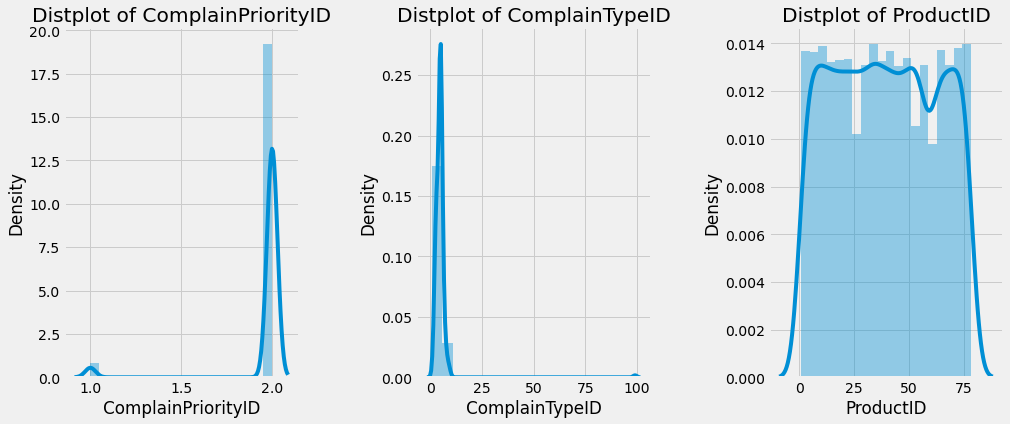

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['ComplainPriorityID' , 'ComplainTypeID' , 'ProductID']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

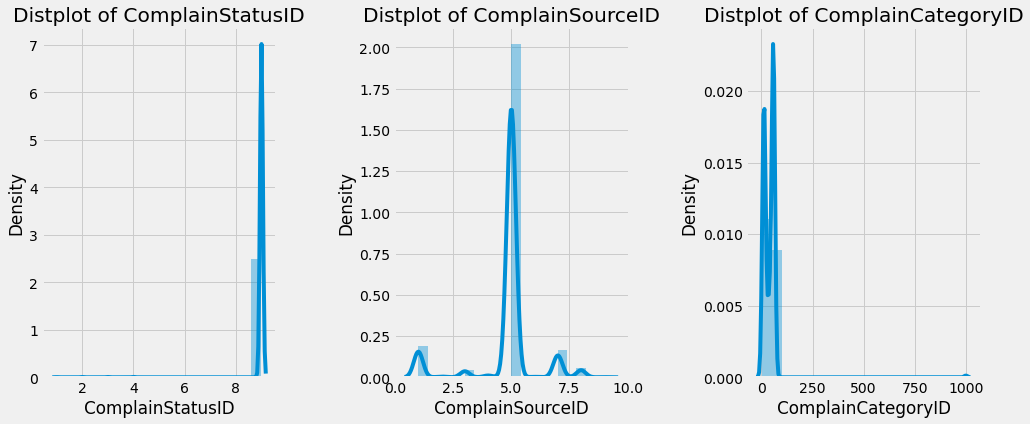

In [24]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['ComplainStatusID' , 'ComplainSourceID' , 'ComplainCategoryID']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
1	Court
2	In person
3	Written
4	Court Order
5	Email
6	Fax
7	Phone
8	Call center
9	Partner / Bank
99	Other

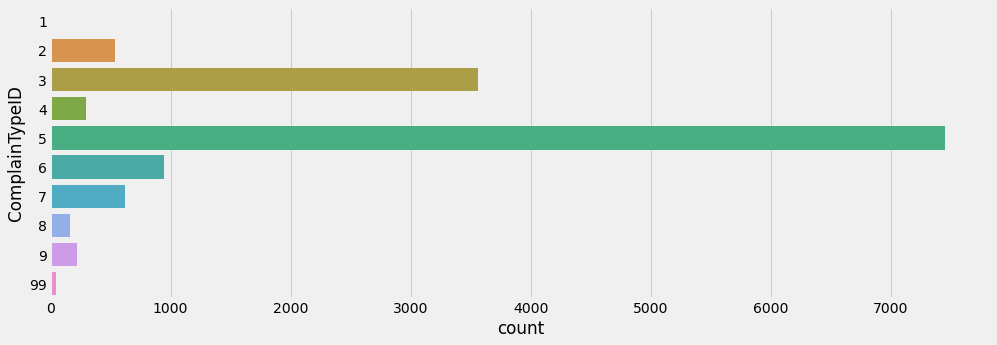

In [16]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'ComplainTypeID' , data = df)
plt.show()

In [ ]:
1	Urgent
2	Non Urgent

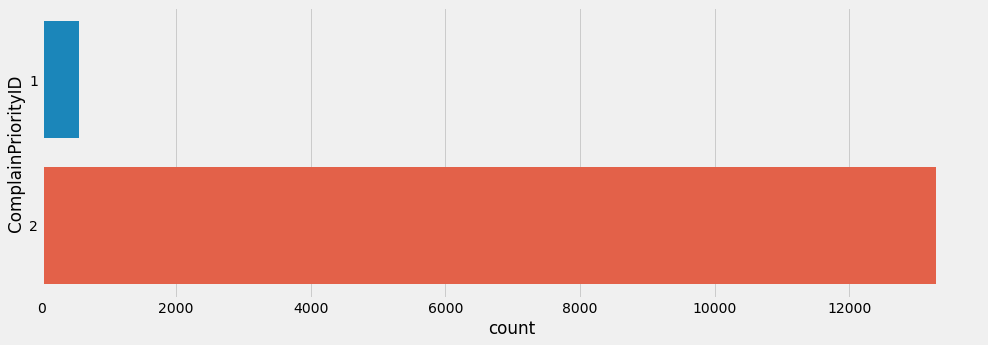

In [17]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'ComplainPriorityID' , data = df)
plt.show()


In [ ]:

1	OUTSTANDING
2	NEW
3	IN PROGRESS
4	ASSIGNED TO
5	RESOLVED
6	PENDING
9	CLOSED

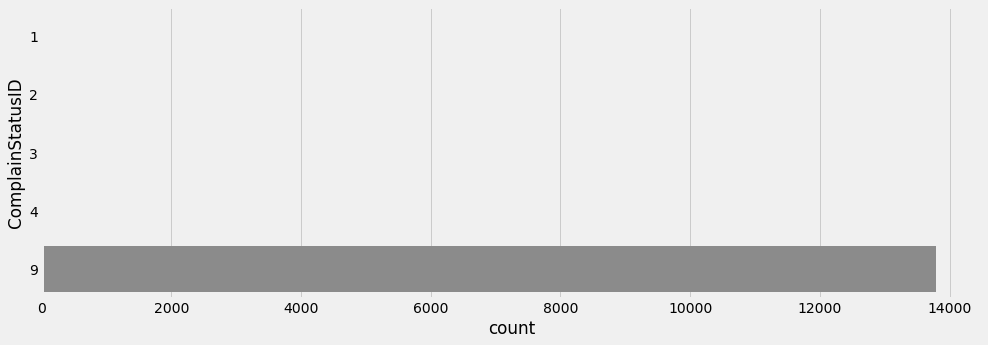

In [25]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'ComplainStatusID' , data = df)
plt.show()

In [ ]:
1	Bank Branch
2	Tele
3	Bank HQ
4	Partner
5	Company HQ
6	Intermediary
7	CRO
8	Call Center
9	Bank Small Business

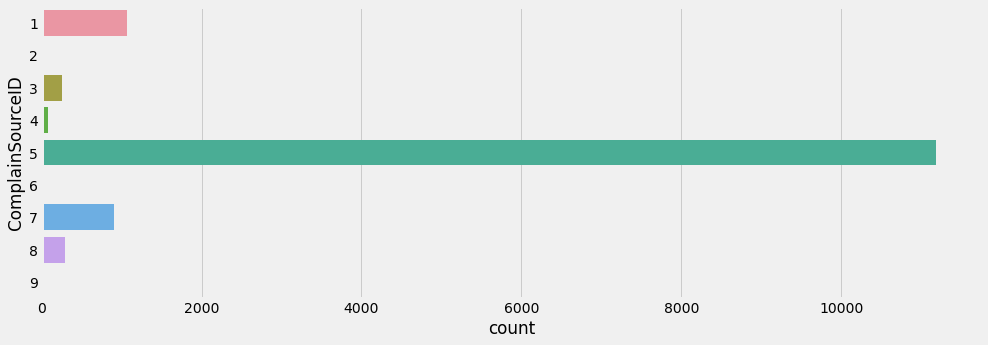

In [27]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'ComplainSourceID' , data = df)
plt.show()

In [ ]:
31	TELEPHONE SCHOOLS
32	PAYMENT POLICY
33	LOW DISCOUNT
34	USE OF OTHER / OTHER EXPENSES
35	USE OF PERSONAL DATA
36	YEARS OF DEPARTURE IN THE PHONES OR NOT AN ANSWER OF CLOSES, UNDERSTANDED LINES
37	NON-MAINTENANCE OF A BANKRUPT
38	SECURITY CONTRACT AGENCY SAINT
40	SECURITY BUILDING REQUEST, SECURITY RETURN
42	INDEPENDENT DISMISSAL
44	SELF-DETERMINED EXPRESSION OF INSURANCE
45	SECURITY PUBLISHING CONTRACT
46	MANAGEMENT-NOT DECISION OF ANOTHER COMPANY CONTRACT
47	USE OF CANCELED CERTIFICATE CARD
50	DISCLAIMER OF DISMISSAL
52	APPLICATION REQUEST
53	NO CONTRACT NOTICE / ON
54	DO NOT USE A REQUEST
55	INSURANCE USE IN ORGANIZATION OF COMPETITIVE LOAN
56	CONTRACT AUTHORITY CAUSE
57	CERTIFICATE OF CONTENTS
58	REGISTRATION FORM OF REGISTRATION
59	YOU HAVE ALWAYS BEEN REQUESTED
60	EMAK TRANSPORT
61	BENEFICIARY MANAGEMENT REQUEST
62	SOME DECISION
63	DISCUSSION DISMISSAL
64	PERFORMANCE / RESISTANCE TO PERSONAL DATA
65	SECURITY CONTRACT MANAGEMENT REQUEST
66	UNDER EXCELLENT DECISION HOW MUCH THE RETURN OF SECURITIES
999	Other


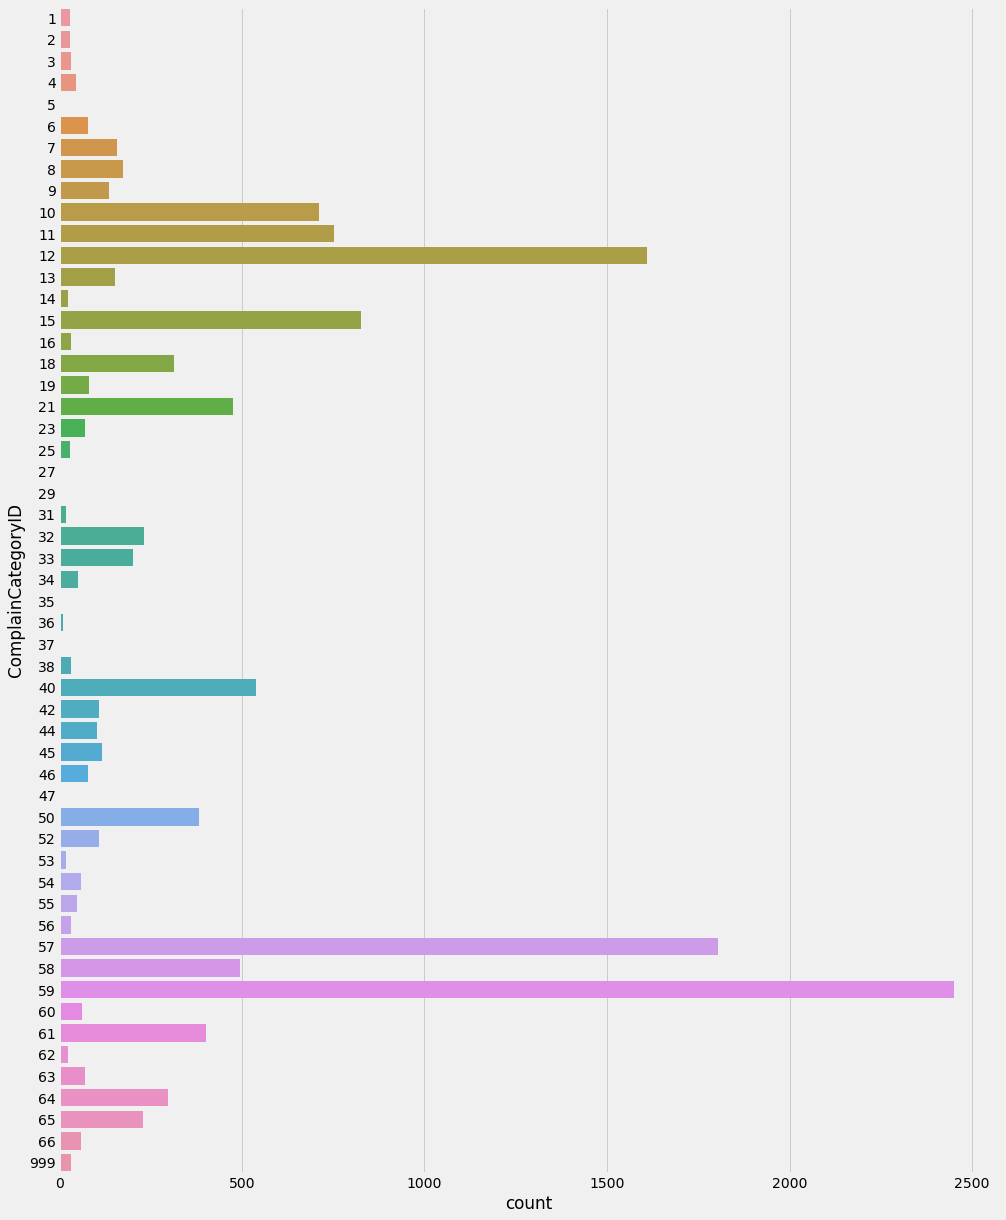

In [29]:
plt.figure(1 , figsize = (15 , 20))
sns.countplot(y = 'ComplainCategoryID' , data = df)
plt.show()
 

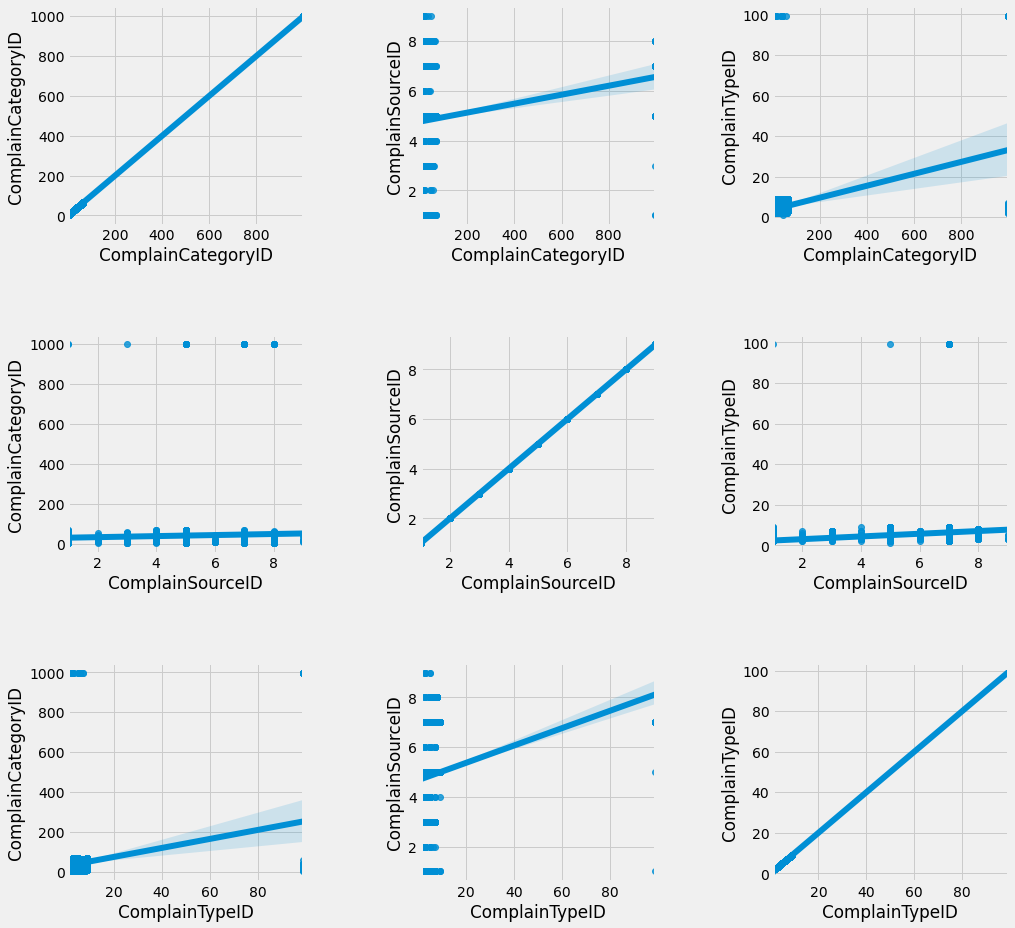

In [31]:
plt.figure(1 , figsize = (15 , 15))
n = 0 
for x in ['ComplainCategoryID' , 'ComplainSourceID' , 'ComplainTypeID']:
    for y in ['ComplainCategoryID' , 'ComplainSourceID' , 'ComplainTypeID']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [51]:
x1 =  df[['ComplainPriorityID','ComplainTypeID','ComplainSourceID','ComplainCategoryID']]
dataset = x1.replace(np.nan,0)
dataset

,ComplainPriorityID,ComplainTypeID,ComplainSourceID,ComplainCategoryID
0,1,5,5,18
1,1,7,3,18
2,1,3,5,13
3,1,5,5,11
4,1,3,5,10
...,...,...,...,...
13841,2,5,5,58
13842,2,9,5,6
13843,2,5,5,63
13844,2,5,5,64


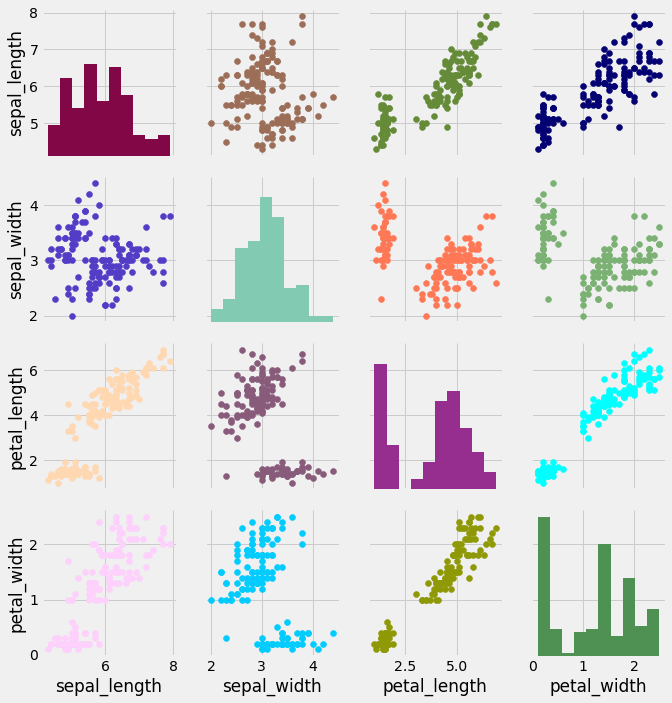

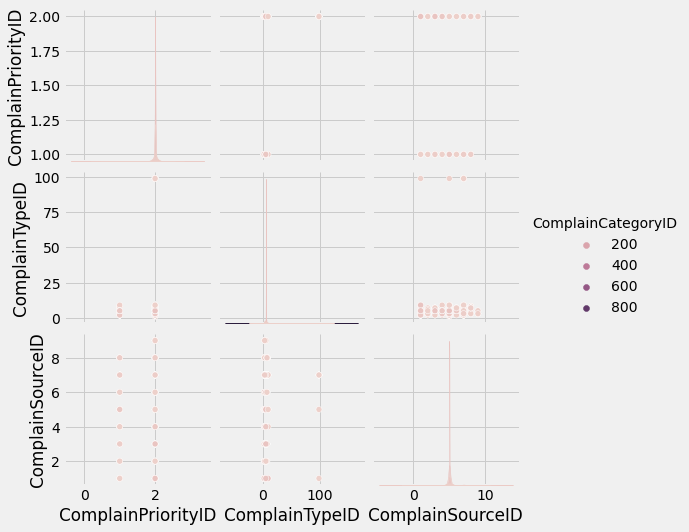

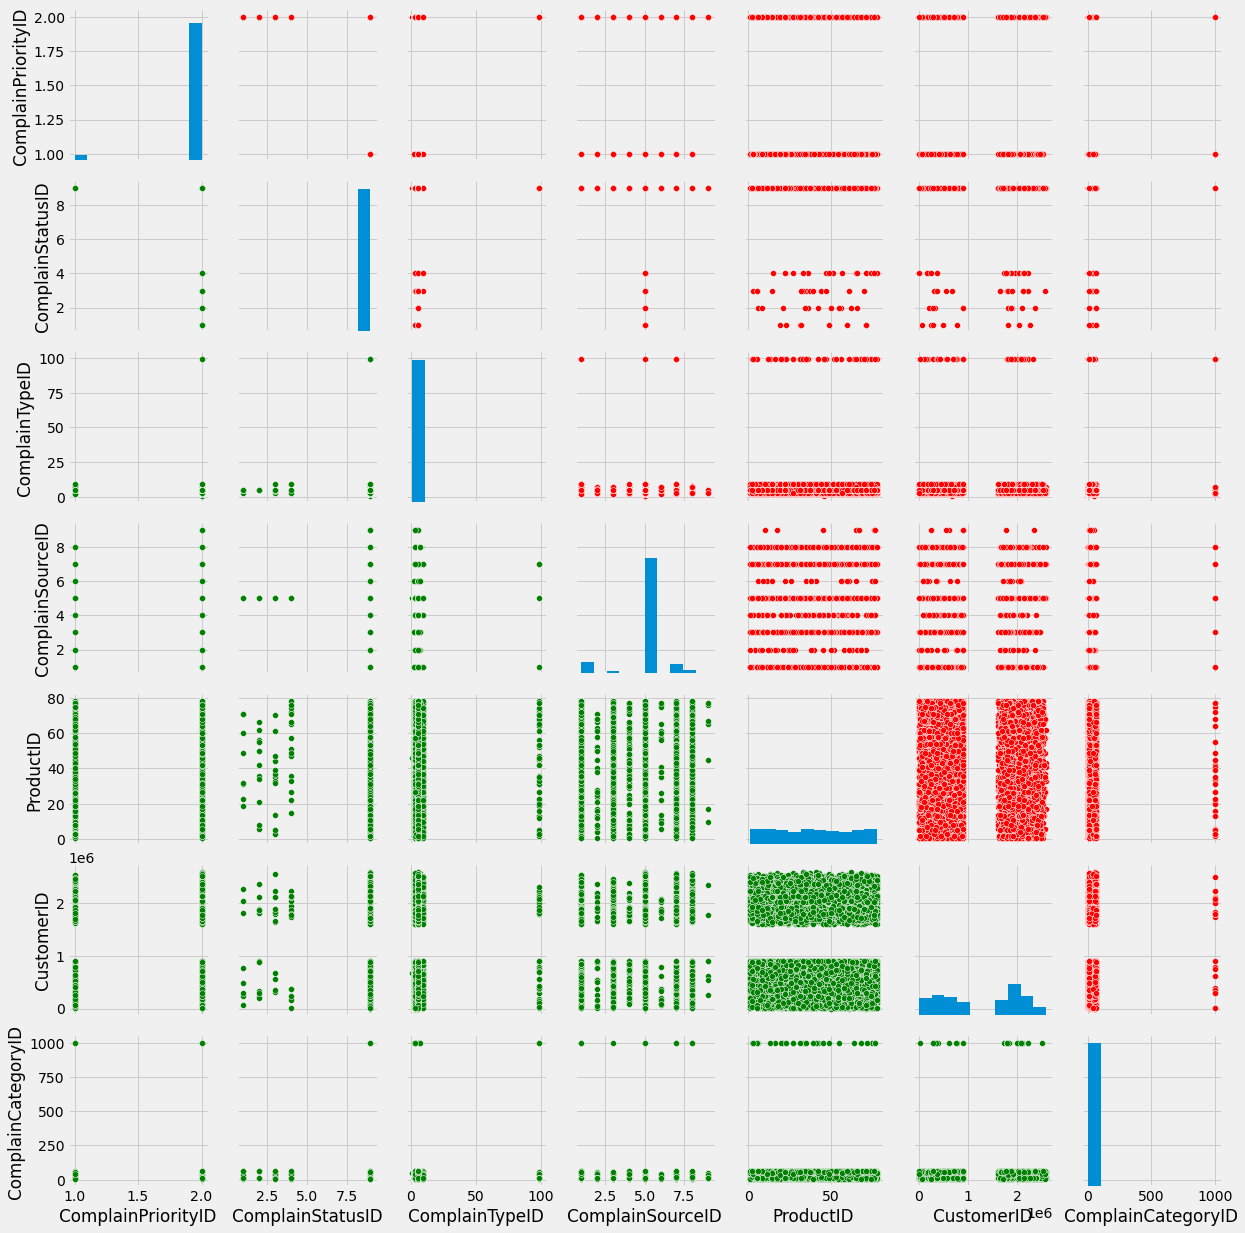

In [54]:
import seaborn as sns
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)
sns.pairplot(x1, hue="ComplainCategoryID")
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)